# Module 7–Unsupervised Learning

### Case Study III - Agglomerative Clustering

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
#from sets import Set
plt.rcParams['figure.figsize'] = (5,5)
plt.style.use('ggplot')

In [45]:
#importing the dataset
data = pd.read_csv('zoo.csv')
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2       

In [46]:
pred_columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
                'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
                'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(data[pred_columns])
print(X)

[[ 1.16139451 -0.49690399 -1.18522652 ... -1.69841555 -0.38435306
   1.13818037]
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]
 ...
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ... -1.69841555 -0.38435306
  -0.87859537]
 [-0.86103386  2.01246118  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]]


In [48]:
print(np.unique(data['class_type']))

[1 2 3 4 5 6 7]


In [49]:
data.loc[data['class_type'] == 6]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
42,ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
88,termite,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6


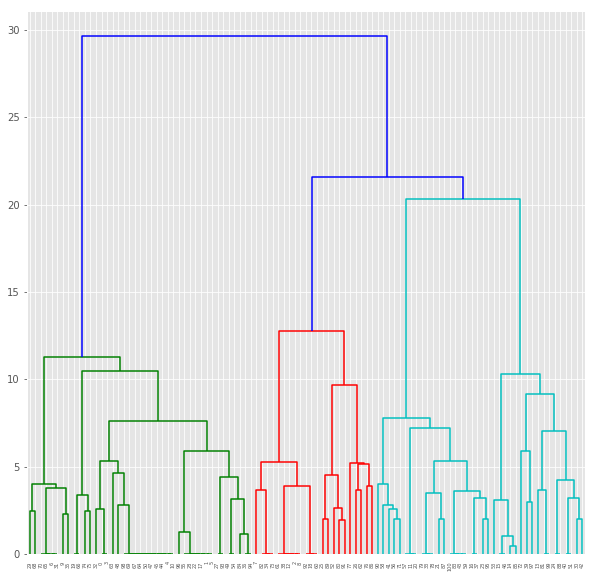

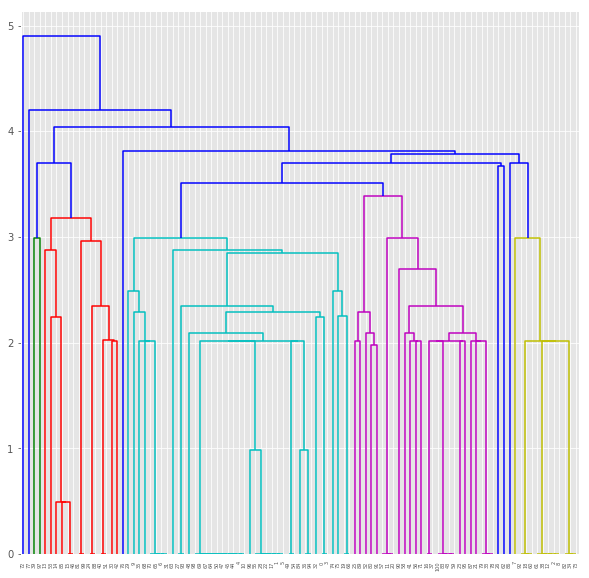

In [50]:
Z = linkage(X, 'ward')
fig = plt.figure(figsize = (10,10))
dn = dendrogram(Z)
Z = linkage(X, 'single')
fig = plt.figure(figsize = (10,10))
dn = dendrogram(Z)
plt.show()

In [51]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=7)
pred_values = agg.fit_predict(X)


In [52]:
data.iloc[3:4,:]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


In [53]:
print(pred_values[0], pred_values[11], pred_values[76], pred_values[2], pred_values[25], pred_values[39], pred_values[13]) 

2 3 1 4 1 0 0


In [54]:
in_list = data.loc[data['class_type'] == 7].index
for i in in_list:
    print(data.loc[i,:'animal_name'], pred_values[i])

animal_name    clam
Name: 13, dtype: object 0
animal_name    crab
Name: 14, dtype: object 0
animal_name    crayfish
Name: 15, dtype: object 0
animal_name    lobster
Name: 46, dtype: object 0
animal_name    octopus
Name: 53, dtype: object 0
animal_name    scorpion
Name: 72, dtype: object 0
animal_name    seawasp
Name: 77, dtype: object 1
animal_name    slug
Name: 81, dtype: object 0
animal_name    starfish
Name: 85, dtype: object 0
animal_name    worm
Name: 99, dtype: object 0


In [55]:
#type(pred_values)
mapping = { 2: 10, 3: 20, 1: 30, 4: 40, 5: 50, 0: 60, 6: 70}
mapped_pred = [mapping[line] for line in pred_values]
print(mapped_pred)
mapping2 = { 10: 1, 20: 2, 30: 3, 40: 4, 50: 5, 60: 6, 70: 7}
mapped_pred2 = [mapping2[line] for line in mapped_pred]
print(mapped_pred2)
Y = data['class_type'].values
print(Y)

[10, 10, 40, 10, 10, 10, 50, 40, 40, 50, 10, 20, 40, 60, 60, 60, 20, 10, 40, 70, 20, 20, 10, 20, 60, 30, 30, 10, 10, 50, 60, 50, 10, 20, 40, 50, 10, 20, 40, 60, 60, 20, 60, 20, 10, 10, 60, 10, 10, 10, 10, 60, 30, 60, 10, 10, 20, 20, 20, 20, 40, 40, 30, 10, 10, 50, 70, 10, 50, 10, 50, 20, 60, 40, 70, 70, 30, 30, 20, 20, 30, 60, 40, 20, 10, 60, 30, 20, 60, 30, 20, 30, 40, 10, 10, 20, 10, 60, 10, 60, 20]
[1, 1, 4, 1, 1, 1, 5, 4, 4, 5, 1, 2, 4, 6, 6, 6, 2, 1, 4, 7, 2, 2, 1, 2, 6, 3, 3, 1, 1, 5, 6, 5, 1, 2, 4, 5, 1, 2, 4, 6, 6, 2, 6, 2, 1, 1, 6, 1, 1, 1, 1, 6, 3, 6, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 5, 7, 1, 5, 1, 5, 2, 6, 4, 7, 7, 3, 3, 2, 2, 3, 6, 4, 2, 1, 6, 3, 2, 6, 3, 2, 3, 4, 1, 1, 2, 1, 6, 1, 6, 2]
[1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]


In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, mapped_pred2)
print(mse)

3.118811881188119


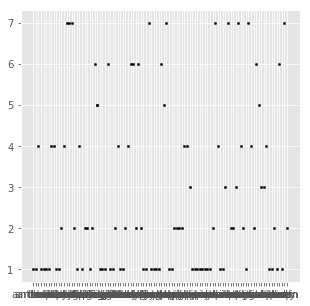

In [57]:
f1 = data['animal_name'].values
f2 = data['class_type'].values
#X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c = 'black', s=5)

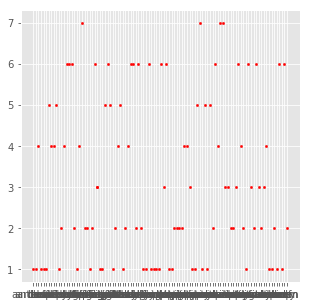

In [58]:
f3 = pd.DataFrame(mapped_pred2)
plt.scatter(f1, f3, c = 'red', s=5)